1. Install dependancies

In [46]:
import tensorflow               # for deep learning and neural network
import cv2                      # for accessing and recording camera motion
import mediapipe as mp          # for keypoints hollistic on body
import sklearn                  # machine learning, training split, metrics
import matplotlib.pyplot as plt # visualize
import os                       # file path working easier
import time                     # take time for frames
import numpy as np

2. keypoints using MP Hollistic

In [47]:
mp_holistic = mp.solutions.holistic     #holistic model , make detections
mp_drawing = mp.solutions.drawing_utils #drawing utlities, draw these detections

In [48]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [62]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def draw_landmarks(image, results):
  """
  Draws the detected landmarks on the input image.

  Args:
    image: The input image (in BGR format).
    results: The results of MediaPipe Holistic processing.

  Returns:
    The image with drawn landmarks.
  """

  # Draw face landmarks (use mp_holistic.FACEMESH_TESSELATION for better visualization)
  mp_drawing.draw_landmarks(
      image, 
      results.face_landmarks, 
      mp_holistic.FACEMESH_TESSELATION, 
      mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1), 
      mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
  )

  # Draw pose landmarks
  mp_drawing.draw_landmarks(
      image, 
      results.pose_landmarks, 
      mp_holistic.POSE_CONNECTIONS,
      mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4), 
      mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
  )

  # Draw left-hand landmarks
  mp_drawing.draw_landmarks(
      image, 
      results.left_hand_landmarks, 
      mp_holistic.HAND_CONNECTIONS,
      mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), 
      mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
  )

  # Draw right-hand landmarks
  mp_drawing.draw_landmarks(
      image, 
      results.right_hand_landmarks, 
      mp_holistic.HAND_CONNECTIONS,
      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4), 
      mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
  )

  return image

In [91]:
def draw_styled_landmarks(image, results):
    # Face connections (Blue-ish)
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=1, circle_radius=1),  # Blue
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=1, circle_radius=1)  # Blue
                             ) 

    # Pose connections (Red-ish)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),  # Red
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Red
                             ) 

    # Left hand connections (Blue-ish)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=2, circle_radius=4),  # Blue
                             mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=2, circle_radius=2)  # Blue
                             ) 

    # Right hand connections (Red-ish)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),  # Red
                             mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Red
                             )

In [63]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [92]:
cap = cv2.VideoCapture(0)

# set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()


        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [94]:
len(results.left_hand_landmarks.landmark)


AttributeError: 'NoneType' object has no attribute 'landmark'

In [95]:
frame

array([[[169, 172, 181],
        [168, 171, 180],
        [167, 169, 177],
        ...,
        [145, 141, 152],
        [148, 144, 156],
        [151, 147, 159]],

       [[171, 173, 181],
        [170, 172, 180],
        [171, 172, 179],
        ...,
        [144, 143, 151],
        [146, 144, 153],
        [147, 145, 155]],

       [[171, 173, 178],
        [172, 173, 178],
        [173, 173, 177],
        ...,
        [147, 151, 154],
        [147, 150, 154],
        [145, 148, 152]],

       ...,

       [[ 56,  57,  70],
        [ 55,  56,  69],
        [ 57,  58,  70],
        ...,
        [ 80,  76,  96],
        [ 79,  75,  93],
        [ 79,  75,  91]],

       [[ 56,  58,  70],
        [ 55,  57,  69],
        [ 58,  59,  70],
        ...,
        [ 76,  75,  92],
        [ 75,  74,  91],
        [ 74,  73,  90]],

       [[ 58,  60,  71],
        [ 56,  58,  69],
        [ 58,  59,  70],
        ...,
        [ 75,  75,  91],
        [ 75,  75,  92],
        [ 74,  74,  92]]

In [155]:
results

mediapipe.python.solution_base.SolutionOutputs

In [83]:
draw_landmarks(frame, results)

array([[[184, 184, 178],
        [184, 184, 178],
        [183, 183, 177],
        ...,
        [152, 158, 158],
        [153, 159, 159],
        [152, 158, 158]],

       [[183, 183, 177],
        [184, 184, 178],
        [184, 184, 178],
        ...,
        [152, 158, 158],
        [152, 157, 158],
        [151, 156, 157]],

       [[184, 182, 178],
        [184, 182, 178],
        [185, 183, 179],
        ...,
        [152, 157, 158],
        [153, 157, 158],
        [152, 156, 157]],

       ...,

       [[ 62,  61,  64],
        [ 62,  61,  64],
        [ 62,  60,  64],
        ...,
        [ 67,  68,  82],
        [ 67,  68,  82],
        [ 66,  68,  82]],

       [[ 63,  62,  65],
        [ 63,  62,  66],
        [ 62,  60,  65],
        ...,
        [ 66,  68,  83],
        [ 66,  68,  83],
        [ 65,  68,  83]],

       [[ 64,  63,  67],
        [ 63,  62,  66],
        [ 63,  61,  67],
        ...,
        [ 65,  68,  83],
        [ 65,  68,  83],
        [ 66,  69,  84]]

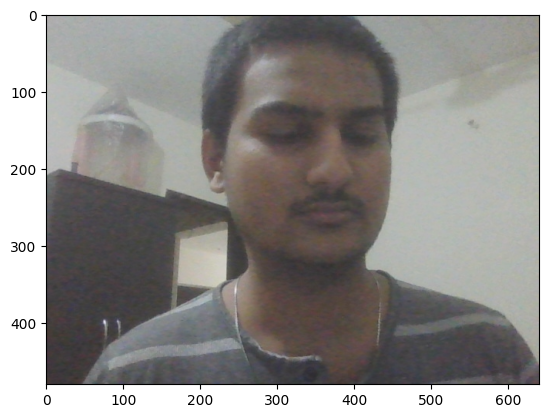

In [97]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values

In [108]:
results.pose_landmarks.landmark[0].visibility

0.9995309114456177

In [112]:
pose = []

for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [116]:
pose
len(pose)

33

In [157]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [164]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [165]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [166]:
extract_keypoints(results)

array([ 0.55820382,  0.3974582 , -1.83759248, ...,  0.        ,
        0.        ,  0.        ])

In [167]:
result_test = extract_keypoints(results)

In [168]:
result_test

array([ 0.55820382,  0.3974582 , -1.83759248, ...,  0.        ,
        0.        ,  0.        ])

In [169]:
468*3+33*4+21*3+21*3

1662

In [170]:
np.save('0', result_test)

In [171]:
np.load('0.npy')

array([ 0.55820382,  0.3974582 , -1.83759248, ...,  0.        ,
        0.        ,  0.        ])

4. Setup folders for collection

5. Collect Keypoint Values for Training and Testing

6. Preprocess Data and Create Labels and features

7. Build and Train LSTM Neural Network

8. Make Predictions

9. Save weights

10. Evaluation using Confusion Matrix and Accuracy

11. Test in Real Time